# Sub question 4b

*Which four countries have the highest electric car and truck sales relative to Gross Domestic Product (GDP), and how have sales trends in these countries developed between 2010 and 2023?*

*Cars per GDP:*
- Top four countries: Iceland, Norway, Sweden, China 
- Year: 2022

*Trucks per GDP:*
- Top four countries: China, Norway, Germany and Sweden
- Year: 2022

In [14]:
# Import helpfull packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Import car data

file_path = 'IEA-EV-dataEV salesHistoricalCars.csv'
df_cars = pd.read_csv(file_path)

df_cars_sales = df_cars[(df_cars['parameter'] == 'EV sales')]

df_cars_ev = df_cars_sales.drop(df_cars_sales[(df_cars_sales['powertrain'] == 'FCEV')       # Drop FCEV
                                | (df_cars_sales['region'] == 'World')                      # Drop World
                                | (df_cars_sales['region'] == 'EU27')                       # Drop EU27
                                | (df_cars_sales['region'] == 'Europe')                     # Drop Europe
                                | (df_cars_sales['region'] == 'Rest of the world')          # Drop Rest of the World
                                | (df_cars_sales['year'] >= 2023)].index)                   # Drop year 2023


In [16]:
# Import truck data

file_path = 'IEA-EV-dataEV salesHistoricalTrucks.csv'
df_trucks = pd.read_csv(file_path)

df_trucks_sales = df_trucks[(df_trucks['parameter'] == 'EV sales')]                                 # Only use the EV-sales

df_trucks_ev = df_trucks_sales.drop(df_trucks_sales[(df_trucks_sales['powertrain'] == 'FCEV')       # Drop FCEV    
                                | (df_trucks_sales['region'] == 'World')                            # Drop World
                                | (df_trucks_sales['region'] == 'EU27')                             # Drop EU27
                                | (df_trucks_sales['region'] == 'Europe')                           # Drop Europe
                                | (df_trucks_sales['region'] == 'Rest of the world')                # Drop Rest of the World
                                | (df_trucks_sales['year'] >= 2023)].index)                         # Drop year 2023      

In [17]:
# Reading the GDP data set and drop non-relevant datapoint

df_gdp = pd.read_csv('national-gdp-constant-usd-wb.csv')                                                    # Import csv file: GDP
df_gdp_years = df_gdp.drop(df_gdp[df_gdp['Year'] < 2010].index)                                             # Remove all years below 2010

df_new_gdp = df_gdp_years.copy()                                                                            # Make a copy of the area_years dataframe
df_new_gdp['Entity'] = df_new_gdp['Entity'].replace({'United States': 'USA', 'Czechia': 'Czech Republic',
                                                       'South Korea': 'Korea', 'Turkey': 'Turkiye'})        # Replace names

car_countries= df_cars_ev['region'].unique()
df_gdp_y_cars = df_new_gdp[df_new_gdp['Entity'].isin(car_countries)]

truck_countries= df_trucks_ev['region'].unique()
df_gdp_y_trucks = df_new_gdp[df_new_gdp['Entity'].isin(truck_countries)]


Electric car/GDP sales

In [18]:
# Create dataframe EVs cars for the top for leading countries in 2022: Iceland, Norway, Sweden, China per GDP

# Iceland

df_cars_ev_iceland = df_cars_ev[df_cars_ev['region'] == 'Iceland']                                                                                # Only use data if it is the right country            
df_cars_ev_iceland_grouped = df_cars_ev_iceland.groupby('year')                                                                                   # Group data by year
df_cars_ev_iceland_total = df_cars_ev_iceland_grouped['value'].sum().reset_index()                                                                # Use reset_index to restart index to start from zero 

iceland_population = df_gdp_y_cars[df_gdp_y_cars['Entity'] == 'Iceland']                                                                          # Use the data of the right country
population_per_year_iceland = iceland_population.set_index('Year')['GDP (constant 2015 US$)']                                                     # Obtain the information about the GDP of the country

df_cars_iceland_per_gdp = df_cars_ev_iceland_total.copy()
df_cars_iceland_per_gdp['population'] = df_cars_iceland_per_gdp['year'].map(population_per_year_iceland)
df_cars_iceland_per_gdp['cars per gdp'] = df_cars_iceland_per_gdp['value'] / df_cars_iceland_per_gdp['population']                                # Average cars in the country per GDP index 

In [19]:
# Norway

df_cars_ev_norway = df_cars_ev[df_cars_ev['region'] == 'Norway']                                                                                # Only use data if it is the right country            
df_cars_ev_norway_grouped = df_cars_ev_norway.groupby('year')                                                                                   # Group data by year
df_cars_ev_norway_total = df_cars_ev_norway_grouped['value'].sum().reset_index()                                                                # Use reset_index to restart index to start from zero 

norway_population = df_gdp_y_cars[df_gdp_y_cars['Entity'] == 'Norway']                                                                          # Use the data of the right country
population_per_year_norway = norway_population.set_index('Year')['GDP (constant 2015 US$)']                                                     # Obtain the information about the GDP of the country

df_cars_norway_per_gdp = df_cars_ev_norway_total.copy()
df_cars_norway_per_gdp['population'] = df_cars_norway_per_gdp['year'].map(population_per_year_norway)
df_cars_norway_per_gdp['cars per gdp'] = df_cars_norway_per_gdp['value'] / df_cars_norway_per_gdp['population']                                 # Average cars in the country per GDP index 


In [20]:
# Sweden

df_cars_ev_sweden = df_cars_ev[df_cars_ev['region'] == 'Sweden']                                                                                # Only use data if it is the right country
df_cars_ev_sweden_grouped = df_cars_ev_sweden.groupby('year')                                                                                   # Group data by year
df_cars_ev_sweden_total = df_cars_ev_sweden_grouped['value'].sum().reset_index()                                                                # Use reset_index to restart index to start from zero 

sweden_population = df_gdp_y_cars[df_gdp_y_cars['Entity'] == 'Sweden']                                                            # Use the data of the right country
population_per_year_sweden = sweden_population.set_index('Year')['GDP (constant 2015 US$)']                                       # Obtain the information about the GDP of the country

df_cars_sweden_per_gdp = df_cars_ev_sweden_total.copy()
df_cars_sweden_per_gdp['population'] = df_cars_sweden_per_gdp['year'].map(population_per_year_sweden)
df_cars_sweden_per_gdp['cars per gdp'] = df_cars_sweden_per_gdp['value'] / df_cars_sweden_per_gdp['population']                   # Average cars in the country per GDP index 

In [21]:
# China

df_cars_ev_china = df_cars_ev[df_cars_ev['region'] == 'China']                                                                     # Only use data if it is the right country            
df_cars_ev_china_grouped = df_cars_ev_china.groupby('year')                                                                        # Group data by year
df_cars_ev_china_total = df_cars_ev_china_grouped['value'].sum().reset_index()                                                     # Use reset_index to restart index to start from zero 

china_population = df_gdp_y_cars[df_gdp_y_cars['Entity'] == 'China']                                                               # Use the data of the right country
population_per_year_china = china_population.set_index('Year')['GDP (constant 2015 US$)']                                          # Obtain the information about the GDP of the country

df_cars_china_per_gdp = df_cars_ev_china_total.copy()
df_cars_china_per_gdp['population'] = df_cars_china_per_gdp['year'].map(population_per_year_china)
df_cars_china_per_gdp['cars per gdp'] = df_cars_china_per_gdp['value'] / df_cars_china_per_gdp['population']                       # Average cars in the country per GDP index 

Electric truck/GDP sales

In [22]:
# Create dataframe EVs trucks for the top for leading countries in 2022: China, Norway, Germany, Sweden

# China

df_trucks_ev_china = df_trucks_ev[df_trucks_ev['region'] == 'China']                                                                # Only use data if it is the right country            
df_trucks_ev_china_grouped = df_trucks_ev_china.groupby('year')                                                                     # Group data by year
df_trucks_ev_china_total = df_trucks_ev_china_grouped['value'].sum().reset_index()                                                  # Use reset_index to restart index to start from zero 

china_population = df_gdp_y_cars[df_gdp_y_cars['Entity'] == 'China']                                                                # Use the data of the right country
population_per_year_china = china_population.set_index('Year')['GDP (constant 2015 US$)']                                           # Obtain the information about the GDP of the country

df_trucks_china_per_gdp = df_trucks_ev_china_total.copy()
df_trucks_china_per_gdp['population'] = df_trucks_china_per_gdp['year'].map(population_per_year_china)
df_trucks_china_per_gdp['trucks per gdp'] = df_trucks_china_per_gdp['value'] / df_trucks_china_per_gdp['population']                # Average trucks in the country per GDP index 


In [23]:
# Norway

df_trucks_ev_norway = df_trucks_ev[df_trucks_ev['region'] == 'Norway']                                                                  # Only use data if it is the right country
df_trucks_ev_norway_grouped = df_trucks_ev_norway.groupby('year')                                                                       # Group data by year
df_trucks_ev_norway_total = df_trucks_ev_norway_grouped['value'].sum().reset_index()                                                    # Use reset_index to restart index to start from zero 

norway_population = df_gdp_y_cars[df_gdp_y_cars['Entity'] == 'Norway']                                                               # Use the data of the right country
population_per_year_norway = norway_population.set_index('Year')['GDP (constant 2015 US$)']                                          # Obtain the information about the GDP of the country

df_trucks_norway_per_gdp = df_trucks_ev_norway_total.copy()
df_trucks_norway_per_gdp['population'] = df_trucks_norway_per_gdp['year'].map(population_per_year_norway)
df_trucks_norway_per_gdp['trucks per gdp'] = df_trucks_norway_per_gdp['value'] / df_trucks_norway_per_gdp['population']              # Average trucks in the country per GDP index 


In [24]:
# Germany

df_trucks_ev_germany = df_trucks_ev[df_trucks_ev['region'] == 'Germany']                                                                   # Only use data if it is the right country
df_trucks_ev_germany_grouped = df_trucks_ev_germany.groupby('year')                                                                        # Group data by year
df_trucks_ev_germany_total = df_trucks_ev_germany_grouped['value'].sum().reset_index()                                                     # Use reset_index to restart index to start from zero 

germany_population = df_gdp_y_cars[df_gdp_y_cars['Entity'] == 'Germany']                                                                 # Use the data of the right country
population_per_year_germany = germany_population.set_index('Year')['GDP (constant 2015 US$)']                                            # Obtain the information about the GDP of the country

df_trucks_germany_per_gdp = df_trucks_ev_germany_total.copy()
df_trucks_germany_per_gdp['population'] = df_trucks_germany_per_gdp['year'].map(population_per_year_germany)
df_trucks_germany_per_gdp['trucks per gdp'] = df_trucks_germany_per_gdp['value'] / df_trucks_germany_per_gdp['population']               # Average trucks in the country per GDP index


In [25]:
# Sweden

df_trucks_ev_sweden = df_trucks_ev[df_trucks_ev['region'] == 'Sweden']                                                             # Only use data if it is the right country
df_trucks_ev_sweden_grouped = df_trucks_ev_sweden.groupby('year')                                                                  # Group data by year
df_trucks_ev_sweden_total = df_trucks_ev_sweden_grouped['value'].sum().reset_index()                                               # Use reset_index to restart index to start from zero 

sweden_population = df_gdp_y_cars[df_gdp_y_cars['Entity'] == 'Sweden']                                                                # Use the data of the right country
population_per_year_sweden = sweden_population.set_index('Year')['GDP (constant 2015 US$)']                                           # Obtain the information about the GDP of the country

df_trucks_sweden_per_gdp = df_trucks_ev_sweden_total.copy()
df_trucks_sweden_per_gdp['population'] = df_trucks_sweden_per_gdp['year'].map(population_per_year_sweden)
df_trucks_sweden_per_gdp['trucks per gdp'] = df_trucks_sweden_per_gdp['value'] / df_trucks_sweden_per_gdp['population']               # Average trucks in the country per GDP index 

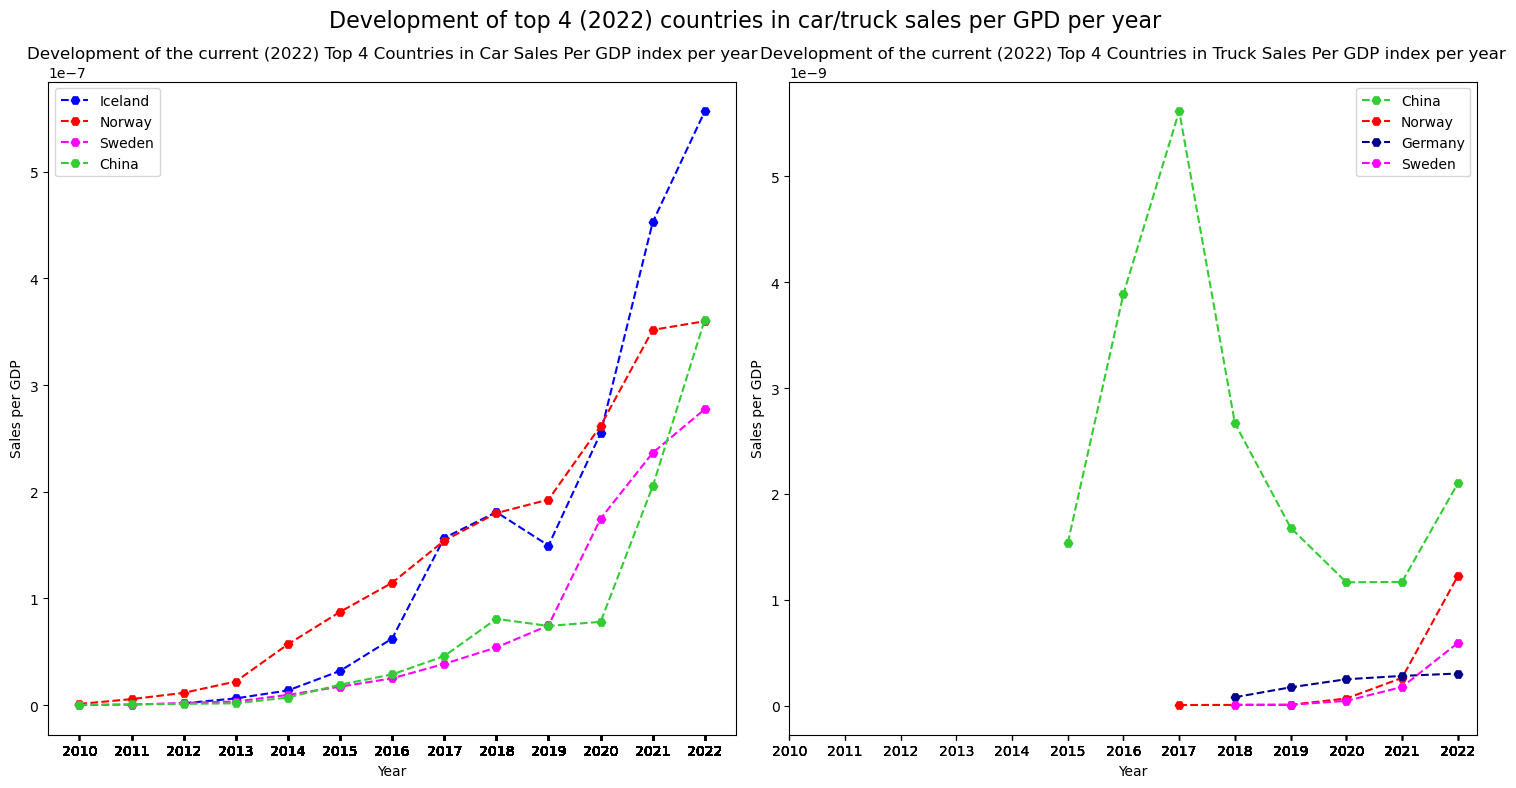

In [26]:
# Create figure with the data above

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Cars: Iceland, Norway, Sweden, and China
ax1.plot(df_cars_iceland_per_gdp['year'], df_cars_iceland_per_gdp['cars per gdp'], label='Iceland', marker='H', linestyle="--", color='blue')                  # Plotting Iceland
ax1.plot(df_cars_norway_per_gdp['year'], df_cars_norway_per_gdp['cars per gdp'], label='Norway', marker='H', linestyle="--", color='red')                      # Plotting Norway
ax1.plot(df_cars_sweden_per_gdp['year'], df_cars_sweden_per_gdp['cars per gdp'], label='Sweden', marker='H', linestyle="--", color='magenta')                  # Plotting Sweden
ax1.plot(df_cars_china_per_gdp['year'], df_cars_china_per_gdp['cars per gdp'], label='China', marker='H', linestyle="--", color='limegreen')                   # Plotting China

ax1.set_title('Development of the current (2022) Top 4 Countries in Car Sales Per GDP index per year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Sales per GDP')
ax1.set_xticks(df_cars_ev['year'])
ax1.legend()

# Trucks: China, Norway, Germany, and Sweden
ax2.plot(df_trucks_china_per_gdp['year'], df_trucks_china_per_gdp['trucks per gdp'], label='China', marker='H', linestyle="--", color='limegreen')                 # Plotting China
ax2.plot(df_trucks_norway_per_gdp['year'], df_trucks_norway_per_gdp['trucks per gdp'], label='Norway', marker='H', linestyle="--", color='red')                    # Plotting Norway
ax2.plot(df_trucks_germany_per_gdp['year'], df_trucks_germany_per_gdp['trucks per gdp'], label='Germany', marker='H', linestyle="--", color='darkblue')            # Plotting Germany
ax2.plot(df_trucks_sweden_per_gdp['year'], df_trucks_sweden_per_gdp['trucks per gdp'], label='Sweden', marker='H', linestyle="--", color='magenta')                # Plotting Sweden
ax2.set_title('Development of the current (2022) Top 4 Countries in Truck Sales Per GDP index per year')
ax2.set_xlabel('Year')
ax2.set_ylabel('Sales per GDP')
ax2.set_xticks(df_trucks_ev['year'])
ax2.legend()

plt.suptitle('Development of top 4 (2022) countries in car/truck sales per GPD per year', fontsize=16)
plt.tight_layout()                                                                                                                                                  # Improve the layout                               
plt.show()